<a href="https://colab.research.google.com/github/ViniitMe/Machine-Learning-foundation-and-Applications/blob/master/Hand_Gesture_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing Libraries
import cv2
import glob
import pandas as pd
import numpy as np
import imutils
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 

In [0]:
A = []
for img in glob.glob("Lab0609/A/*.jpg"):
    image = cv2.imread(img)
    A.append(image)

# Selecting best Features

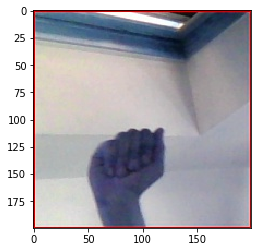

In [0]:
# Choosing best parameters
gray = cv2.cvtColor(A[121],cv2.COLOR_BGR2GRAY)
# gray = cv2.GaussianBlur(gray,(5,5),0)
gray = cv2.medianBlur(gray, 5)
# gray = cv2.bilateralFilter(gray,9,70,70)
bin_img = cv2.threshold(gray, 110, 255, cv2.THRESH_BINARY)[1]
th2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

# cv2.imshow("img",A[0])
# cv2.imshow("img",bin_img)
# cv2.imshow("img",th2)
# cv2.imshow("img",th3)
# cv2.waitKey(0)
plt.imshow(A[121])

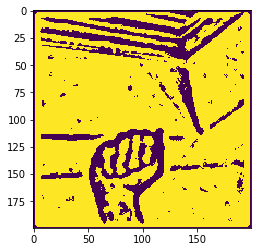

In [0]:
plt.imshow(th2)

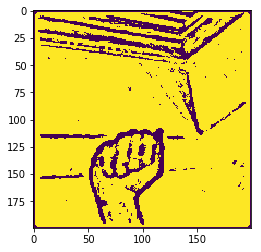

In [0]:
plt.imshow(th3)

In [0]:
A1 = imutils.resize(A[190],width=50,height=50)
A2 = cv2.resize(A[190],(50,50),interpolation = cv2.INTER_AREA) 
gray = cv2.cvtColor(A2, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 5)
final = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

plt.imshow(final)
# Same Preprocessing steps are going to be implemented on every image

# Image Preprocessing

In [0]:
def image_preprocessing(file_location):
  image_set = []
  for img in glob.glob("Lab0609/" + str(file_location) +"/*.jpg"):
    image = cv2.imread(img)
    image = cv2.resize(image,(50,50),interpolation = cv2.INTER_AREA)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray, 5)
    final = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    image_set.append(final)
  return image_set

# Preprocessing steps

1) Reducing the Image-Size for removing memory error keeping the same resolution
2) Grayscaling of BGR images
3) Median Blurring(this is giving best results among median and gaussian blurring technique)
4) Adaptive Thresholding with Binarization

In [0]:
# Loading images with respecting folders:
A = image_preprocessing('A')
B = image_preprocessing('B')
C = image_preprocessing('C')
D = image_preprocessing('D')
E = image_preprocessing('E')
F = image_preprocessing('F')
G = image_preprocessing('G')
H = image_preprocessing('H')
I = image_preprocessing('I')
nothing = image_preprocessing("nothing")

In [0]:
alp = [A,B,C,D,E,F,G,H,I,nothing]
for i in alp:
    print(len(i))

3000
3000
3000
3000
3000
3000
3000
3000
3000
3000


# Train-Test Split

In [0]:
x_train = np.concatenate((A,B,C,D,E,F,G,H,I,nothing))

In [0]:
x = x_train.reshape(30000,-1)

In [0]:
y_train = np.concatenate((np.ones((3000,1)), 2 * np.ones((3000,1)), 3 * np.ones((3000,1)), 4 * np.ones((3000,1)), 5 * np.ones((3000,1)), 6 * np.ones((3000,1)), 7 * np.ones((3000,1)), 8 * np.ones((3000,1)), 9 * np.ones((3000,1)), 10 * np.ones((3000,1))))
y_train = y_train.reshape(30000)

In [0]:
# Train-Test Split
x_train,x_test,y_train,y_test = train_test_split(x, y_train, test_size = 0.3)

In [0]:
print("x_train_shape:" +str(x_train.shape))
print("y_train_shape:" +str(y_train.shape))
print("x_test_shape:" +str(x_test.shape))
print("y_test_shape:" +str(y_test.shape))

x_train_shape:(21000, 2500)
y_train_shape:(21000,)
x_test_shape:(9000, 2500)
y_test_shape:(9000,)


# KNN Implementation

In [0]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [0]:
y_pred = clf.predict(x_test)

In [0]:
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy of KNN Classifier:" + str(accuracy))

Accuracy of KNN Classifier:0.9576666666666667


Obtained Accuracy using KNN Classifier is 95.76%

# SVM Implementation

In [0]:
clf2 = SVC()
clf2.fit(x_train,y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = clf2.predict(x_test)

In [0]:
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy of SVM Classifier:" + str(accuracy))

Accuracy of SVM Classifier:0.09444444444444444


Grid Search for parameter tuning

In [0]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

In [0]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [0]:
# fitting the model for grid search 
grid.fit(x_train, y_train)

In [0]:
grid_pred = grid.predict(x_test) 
  
# print classification report 
print(classification_report(y_test, grid_pred))

In [0]:
accuracy = accuracy_score(grid_pred, y_test)
print("Accuracy of SVM Classifier:" + str(accuracy))

# Result

Using KNN the accuracy obtained is 95.76%
Using SVM without any parameter tuning, accuracy obtained is quite low.
With parameter tuning, the SVM classifier takes approx 36 hours to train on local device with accuracy approx 90%.

Further Improvement can be done by substracting the background from the image set.